140810230014 - Muhammad Zahran Muntazar

Import Library

In [1]:
import urllib.request
import zipfile
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

Download dan Ekstrak Dataset

In [2]:
def prepare_dataset():
    data_url_1 = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
    urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip')
    local_file = 'horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/horse-or-human')
    
    data_url_2 = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
    urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip')
    local_file = 'validation-horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/validation-horse-or-human')
    zip_ref.close()
    
    print("Dataset berhasil diunduh dan diekstrak.")

prepare_dataset()

Dataset berhasil diunduh dan diekstrak.


Periksa Dataset

In [3]:
TRAINING_DIR = 'data/horse-or-human'
VALIDATION_DIR = 'data/validation-horse-or-human'

train_horses = len(os.listdir(os.path.join(TRAINING_DIR, 'horses')))
train_humans = len(os.listdir(os.path.join(TRAINING_DIR, 'humans')))
val_horses = len(os.listdir(os.path.join(VALIDATION_DIR, 'horses')))
val_humans = len(os.listdir(os.path.join(VALIDATION_DIR, 'humans')))

print(f"Jumlah gambar kuda di training set: {train_horses}")
print(f"Jumlah gambar manusia di training set: {train_humans}")
print(f"Jumlah gambar kuda di validation set: {val_horses}")
print(f"Jumlah gambar manusia di validation set: {val_humans}")

Jumlah gambar kuda di training set: 500
Jumlah gambar manusia di training set: 527
Jumlah gambar kuda di validation set: 128
Jumlah gambar manusia di validation set: 128


Persiapan Data Generator

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


Definisi Fungsi solution_05() - Arsitektur Model

In [5]:
def solution_05():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),  
        
        tf.keras.layers.Dense(1, activation='sigmoid') 
    ])

    model.compile(
        loss='binary_crossentropy',
        optimizer=RMSprop(learning_rate=0.001),
        metrics=['accuracy']
    )
    
    return model

model = solution_05()

model.summary()

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,667,169 (6.36 MB)

 Trainable params: 1,667,169 (6.36 MB)

 Non-trainable params: 0 (0.00 B)

Training Model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1
)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 29s 849ms/step - accuracy: 0.5518 - loss: 0.6803 - val_accuracy: 0.5156 - val_loss: 1.3628
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.7806 - loss: 0.4685 - val_accuracy: 0.7148 - val_loss: 1.4329
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.8850 - loss: 0.2612 - val_accuracy: 0.6406 - val_loss: 1.4542
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.8849 - loss: 0.2581 - val_accuracy: 0.8242 - val_loss: 0.7773
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.9436 - loss: 0.1755 - val_accuracy: 0.7070 - val_loss: 2.3478
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.9091 - loss: 0.2130 - val_accuracy: 0.5000 - val_loss: 8.2570
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.8902 - loss: 0.3497 - val_accuracy: 0.7812 - val_loss: 1.6987
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.9620 - loss: 0.1174 - val_accuracy: 0

Evaluasi Model dan Visualisasi

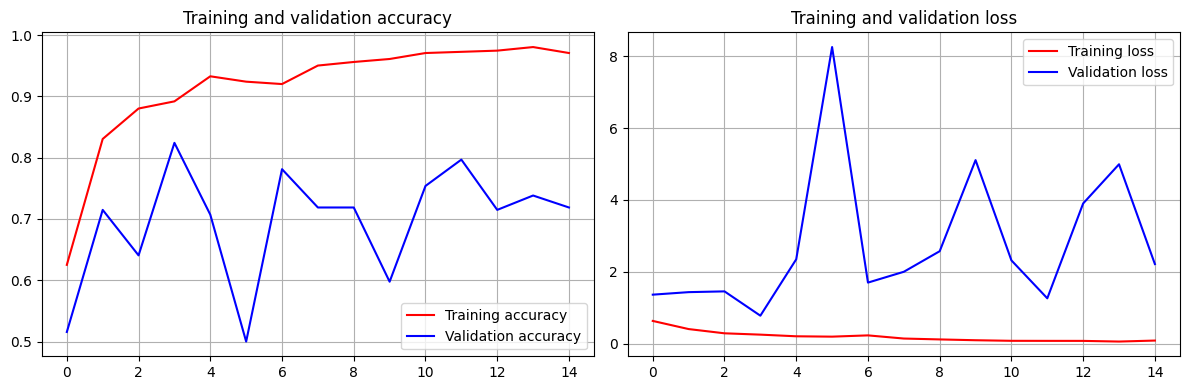

Final training accuracy: 97.08%
Final validation accuracy: 71.88%
Model belum memenuhi standar akurasi yang ditentukan (>83%).


In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print(f"Final training accuracy: {acc[-1]*100:.2f}%")
print(f"Final validation accuracy: {val_acc[-1]*100:.2f}%")

if acc[-1] > 0.83 and val_acc[-1] > 0.83:
    print("Model memenuhi standar akurasi yang ditentukan (>83%)!")
else:
    print("Model belum memenuhi standar akurasi yang ditentukan (>83%).")

Menyimpan Model

In [8]:
model.save("model_05.h5")
print("Model berhasil disimpan sebagai 'model_05.h5'")

Model berhasil disimpan sebagai 'model_05.h5'


Contoh Prediksi 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Path: data/validation-horse-or-human\horses\horse4-541.png
Prediksi: Human dengan confidence 0.84


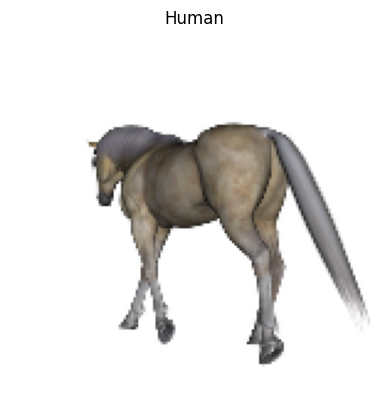

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Path: data/validation-horse-or-human\horses\horse6-544.png
Prediksi: Human dengan confidence 1.00


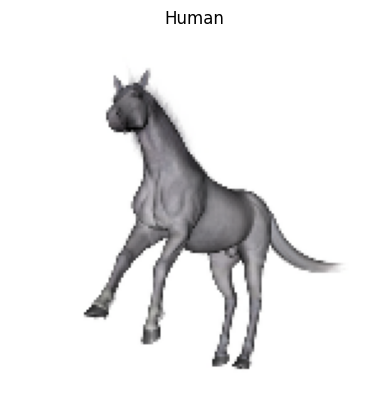

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Path: data/validation-horse-or-human\humans\valhuman01-09.png
Prediksi: Human dengan confidence 1.00


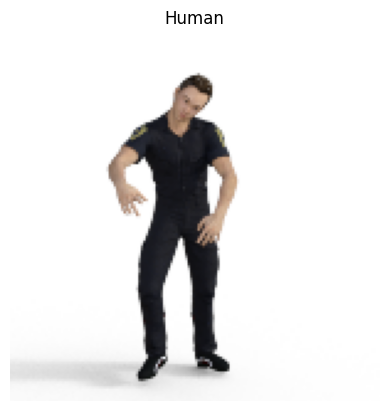

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Path: data/validation-horse-or-human\humans\valhuman04-24.png
Prediksi: Human dengan confidence 1.00


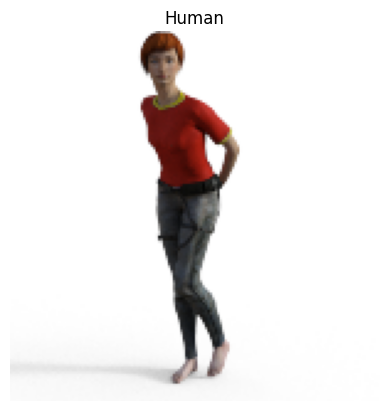

In [9]:
import random
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0
    
    classes = model.predict(x)
    print(f"Path: {img_path}")
    print(f"Prediksi: {'Human' if classes[0][0] > 0.5 else 'Horse'} dengan confidence {abs(classes[0][0] - 0.5) * 2:.2f}")
    
    plt.imshow(img)
    plt.title(f"{'Human' if classes[0][0] > 0.5 else 'Horse'}")
    plt.axis('off')
    plt.show()

horse_samples = random.sample(os.listdir(os.path.join(VALIDATION_DIR, 'horses')), 2)
human_samples = random.sample(os.listdir(os.path.join(VALIDATION_DIR, 'humans')), 2)

for sample in horse_samples:
    predict_image(os.path.join(VALIDATION_DIR, 'horses', sample))

for sample in human_samples:
    predict_image(os.path.join(VALIDATION_DIR, 'humans', sample))